In [147]:
# !pip install pycoingecko

In [148]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt

In [149]:
gecko_list = [
    "ethereum"
]

In [150]:
cg = CoinGeckoAPI()

In [151]:
timePeriod = 300

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

In [152]:
df_cyptocurrency = pd.concat(frame_list, axis=1).sort_index()
df_cyptocurrency

,ethereum
1658016000000,1355.045640
1658102400000,1344.720284
1658188800000,1570.658959
1658275200000,1542.629821
1658361600000,1527.413931
...,...
1683590400000,1849.288630
1683676800000,1846.064264
1683763200000,1842.865559
1683849600000,1798.071946


In [153]:
df_cyptocurrency["datetime"] = pd.to_datetime(df_cyptocurrency.index, unit="ms")
df_cyptocurrency["date"] = df_cyptocurrency["datetime"].dt.date
df_cyptocurrency["hour"] = df_cyptocurrency["datetime"].dt.hour
df_cyptocurrency

,ethereum,datetime,date,hour
1658016000000,1355.045640,2022-07-17 00:00:00,2022-07-17,0
1658102400000,1344.720284,2022-07-18 00:00:00,2022-07-18,0
1658188800000,1570.658959,2022-07-19 00:00:00,2022-07-19,0
1658275200000,1542.629821,2022-07-20 00:00:00,2022-07-20,0
1658361600000,1527.413931,2022-07-21 00:00:00,2022-07-21,0
...,...,...,...,...
1683590400000,1849.288630,2023-05-09 00:00:00,2023-05-09,0
1683676800000,1846.064264,2023-05-10 00:00:00,2023-05-10,0
1683763200000,1842.865559,2023-05-11 00:00:00,2023-05-11,0
1683849600000,1798.071946,2023-05-12 00:00:00,2023-05-12,0


In [154]:
df_cyptocurrency = df_cyptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name", ignore_index=True
)
df_cyptocurrency.head(5)

,datetime,date,hour,currency_name,value
0,2022-07-17,2022-07-17,0,ethereum,1355.045640
1,2022-07-18,2022-07-18,0,ethereum,1344.720284
2,2022-07-19,2022-07-19,0,ethereum,1570.658959
3,2022-07-20,2022-07-20,0,ethereum,1542.629821
4,2022-07-21,2022-07-21,0,ethereum,1527.413931


In [155]:
df_cyptocurrency.dropna(inplace=True)

In [156]:
curr = dict(
    [
        ("ethereum", "ETH"),
    ]
)

df_cyptocurrency["coin_symbol"] = df_cyptocurrency["currency_name"].apply(
    lambda c: curr[c]
)

In [157]:
df_cyptocurrency

,datetime,date,hour,currency_name,value,coin_symbol
0,2022-07-17 00:00:00,2022-07-17,0,ethereum,1355.045640,ETH
1,2022-07-18 00:00:00,2022-07-18,0,ethereum,1344.720284,ETH
2,2022-07-19 00:00:00,2022-07-19,0,ethereum,1570.658959,ETH
3,2022-07-20 00:00:00,2022-07-20,0,ethereum,1542.629821,ETH
4,2022-07-21 00:00:00,2022-07-21,0,ethereum,1527.413931,ETH
...,...,...,...,...,...,...
296,2023-05-09 00:00:00,2023-05-09,0,ethereum,1849.288630,ETH
297,2023-05-10 00:00:00,2023-05-10,0,ethereum,1846.064264,ETH
298,2023-05-11 00:00:00,2023-05-11,0,ethereum,1842.865559,ETH
299,2023-05-12 00:00:00,2023-05-12,0,ethereum,1798.071946,ETH


In [158]:
df_cyptocurrency.dtypes

datetime         datetime64[ns]
date                     object
hour                      int64
currency_name            object
value                   float64
coin_symbol              object
dtype: object

In [159]:
df_cyptocurrency['Date'] = pd.to_datetime(df_cyptocurrency['datetime'])
df_filtered = df_cyptocurrency[(df_cyptocurrency['datetime'] >= '2022-08-15') & (df_cyptocurrency['datetime'] <= '2022-09-15')]

In [160]:
df_filtered.head(5)

,datetime,date,hour,currency_name,value,coin_symbol,Date
29,2022-08-15,2022-08-15,0,ethereum,1936.701164,ETH,2022-08-15
30,2022-08-16,2022-08-16,0,ethereum,1908.277642,ETH,2022-08-16
31,2022-08-17,2022-08-17,0,ethereum,1880.600101,ETH,2022-08-17
32,2022-08-18,2022-08-18,0,ethereum,1834.826453,ETH,2022-08-18
33,2022-08-19,2022-08-19,0,ethereum,1850.111291,ETH,2022-08-19


----
### Plotting para permitir verificar a variação do preço

In [161]:
df_daily = df_filtered.groupby(['Date', 'currency_name'])['value'].agg('mean').reset_index()


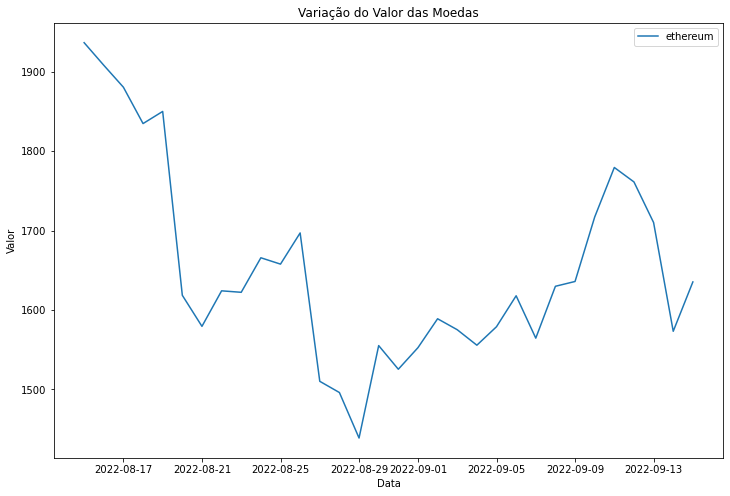

In [162]:
fig, ax = plt.subplots(figsize=(12, 8))

for currency in df_daily['currency_name'].unique():
    df_currency = df_daily[df_daily['currency_name'] == currency]
    ax.plot(df_currency['Date'], df_currency['value'], label=currency)

ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.set_title('Variação do Valor das Moedas')
ax.legend()
plt.show()


In [163]:
df_filtered = df_filtered[ ~( df_filtered.isin( [np.inf, -np.inf]).any(axis =1) )] #to remove inf

In [164]:
df_filtered = df_filtered.rename(columns={'date': 'Date', 'value': 'Value'})

df_filtered.to_csv('../data/price_mining.csv', index=False)

In [165]:
print(np.isinf(df_filtered['Value']).any()) 

False


In [168]:
df_filtered['Value'].isnull().values.any()

False